<h2 style="color: #4CAF50;">Nearest Neighbor Interpolation and Resizing</h2>

<p style="color: #555;">The Nearest Neighbor Interpolation method is a simple and fast technique for resizing images. It works by assigning each pixel in the resized image to the nearest pixel in the original image. This method can result in a blocky appearance, especially when enlarging images.</p>

<h3 style="color: #2196F3;">Code Implementation</h3>



In [36]:
def nearest_neighbor_resize(image, new_width, new_height):
    original_height, original_width = image.shape[:2]  # Get original dimensions
    resized_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)  # Create an empty image array

    for i in range(new_height):
        for j in range(new_width):
            # Calculate corresponding pixel in the original image
            x = int(i * original_height / new_height)
            y = int(j * original_width / new_width)
            resized_image[i, j] = image[x, y]  # Assign color of the nearest pixel

    return resized_image

# Example usage
resized_nn = nearest_neighbor_resize(image_array, new_width=200, new_height=200)
Image.fromarray(resized_nn).show()  # Display the resized image


<h2 style="color: #FF5722;">Bilinear Interpolation and Resizing</h2>

<p style="color: #555;">Bilinear Interpolation is a more advanced method of resizing images, which uses the nearest four pixels to calculate the output pixel's value. This technique provides smoother results compared to nearest neighbor interpolation.</p>

<h3 style="color: #2196F3;">Code Implementation</h3>


In [37]:
def bilinear_resize(image, new_width, new_height):
    original_height, original_width = image.shape[:2]  # Get original dimensions
    resized_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)  # Create an empty image array

    for i in range(new_height):
        for j in range(new_width):
            # Calculate corresponding pixel in the original image
            x = i * (original_height - 1) / (new_height - 1)
            y = j * (original_width - 1) / (new_width - 1)
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, original_height - 1), min(y1 + 1, original_width - 1)

            # Calculate weights for interpolation
            a = (x2 - x) * (y2 - y)
            b = (x - x1) * (y2 - y)
            c = (x2 - x) * (y - y1)
            d = (x - x1) * (y - y1)

            # Assign the interpolated pixel value
            resized_image[i, j] = (
                a * image[x1, y1] +
                b * image[x2, y1] +
                c * image[x1, y2] +
                d * image[x2, y2]
            )

    return resized_image

# Example usage
resized_bilinear = bilinear_resize(image_array, new_width=200, new_height=200)
Image.fromarray(resized_bilinear).show()  # Display the resized image


<h2 style="color: #3F51B5;">Convolution</h2>

<p style="color: #555;">Convolution is a fundamental operation in image processing, used to apply filters to images. By sliding a kernel over the image and computing the weighted sum of the overlapping pixels, we can enhance features, detect edges, and more.</p>

<h3 style="color: #2196F3;">Code Implementation</h3>


In [38]:
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape  # Get kernel dimensions
    pad_height = kernel_height // 2  # Calculate padding sizes
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')  # Pad the image
    convolved_image = np.zeros_like(image)  # Create an empty image array

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract region corresponding to the kernel
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            convolved_image[i, j] = np.sum(region * kernel[:, :, np.newaxis], axis=(0, 1))  # Apply kernel

    return convolved_image

# Example usage
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])  # Example kernel for edge detection
convolved_image = convolve(image_array, kernel)
Image.fromarray(convolved_image).show()  # Display the convolved image


<h2 style="color: #009688;">Gaussian Filter</h2>

<p style="color: #555;">A Gaussian filter is used to smooth images by reducing noise and detail. It uses a Gaussian function to create a kernel that applies varying weights to the surrounding pixels, effectively blurring the image.</p>

<h3 style="color: #2196F3;">Code Implementation</h3>


In [39]:
def gaussian_filter(image, sigma):
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)  # Determine kernel size
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) *
                     np.exp(-((x - (kernel_size - 1) / 2) ** 2 + (y - (kernel_size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (kernel_size, kernel_size)  # Create the Gaussian kernel
    )
    kernel /= np.sum(kernel)  # Normalize the kernel

    return convolve(image, kernel)  # Apply convolution with the Gaussian kernel

# Example usage
filtered_image = gaussian_filter(image_array, sigma=1.5)
Image.fromarray(filtered_image).show()  # Display the filtered image


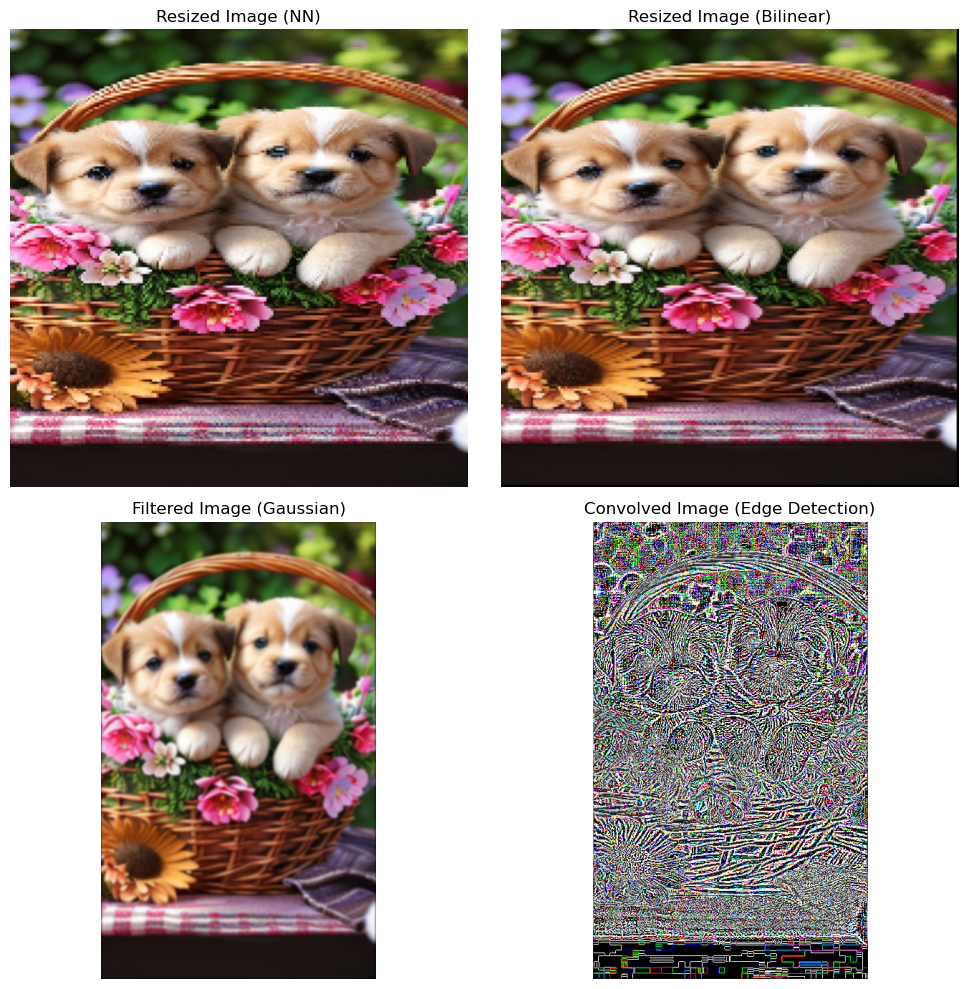

In [40]:
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot library
# Example Usage
# Load image
input_image = Image.open("C:\\Users\\User\\OneDrive\\Desktop\\img.jpeg")
image_array = np.array(input_image)

# Resize using Nearest Neighbor
resized_nn = nearest_neighbor_resize(image_array, new_width=200, new_height=200)

# Resize using Bilinear Interpolation
resized_bilinear = bilinear_resize(image_array, new_width=200, new_height=200)

# Apply Gaussian Filter
filtered_image = gaussian_filter(image_array, sigma=1.5)

# Convolve with a sample kernel (e.g., edge detection)
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])
convolved_image = convolve(image_array, kernel)

# Display all images in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Titles for the images
titles = ['Resized Image (NN)', 'Resized Image (Bilinear)', 'Filtered Image (Gaussian)', 'Convolved Image (Edge Detection)']
images = [resized_nn, resized_bilinear, filtered_image, convolved_image]

# Plotting each image
for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img.astype(np.uint8))  # Ensure the image is in the correct format
    ax.set_title(title)
    ax.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()  # Display the grid of images

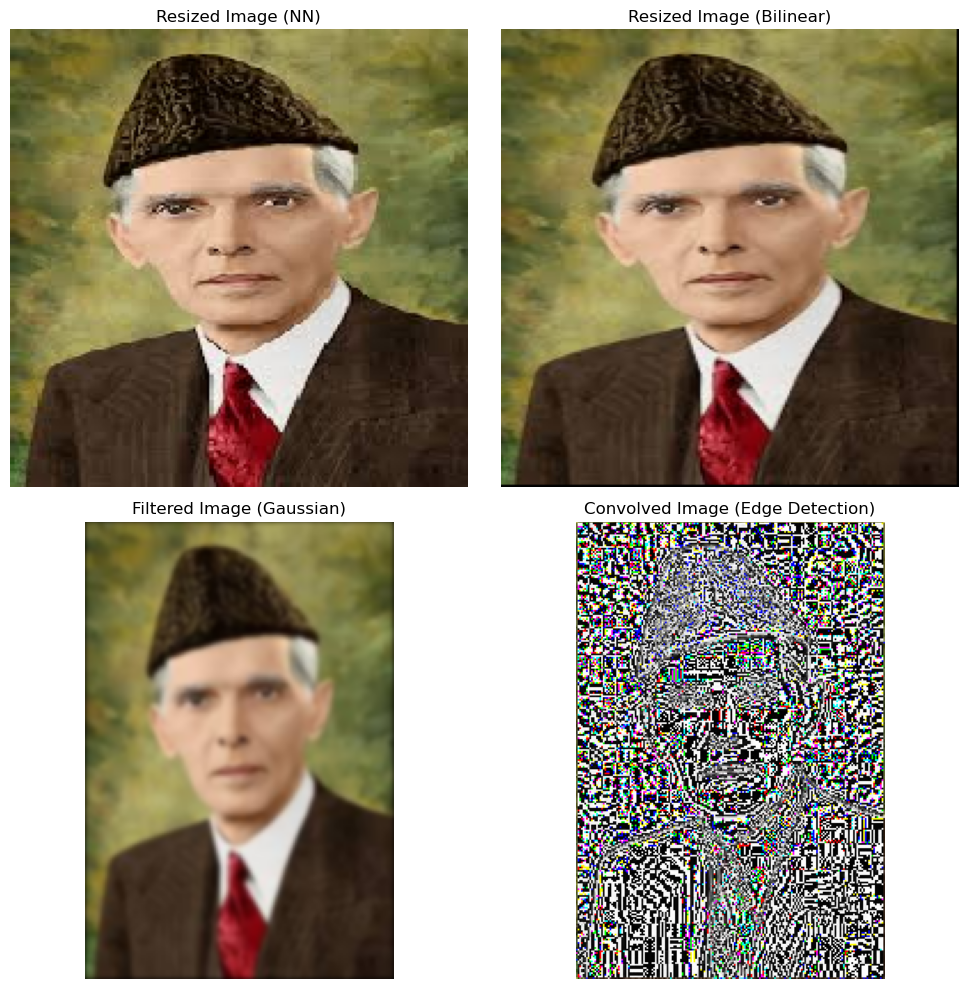

In [41]:
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot library
# Example Usage
# Load image
input_image = Image.open("C:\\Users\\User\\OneDrive\\Desktop\\quaid.jpeg")
image_array = np.array(input_image)

# Resize using Nearest Neighbor
resized_nn = nearest_neighbor_resize(image_array, new_width=200, new_height=200)

# Resize using Bilinear Interpolation
resized_bilinear = bilinear_resize(image_array, new_width=200, new_height=200)

# Apply Gaussian Filter
filtered_image = gaussian_filter(image_array, sigma=1.5)

# Convolve with a sample kernel (e.g., edge detection)
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])
convolved_image = convolve(image_array, kernel)

# Display all images in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Titles for the images
titles = ['Resized Image (NN)', 'Resized Image (Bilinear)', 'Filtered Image (Gaussian)', 'Convolved Image (Edge Detection)']
images = [resized_nn, resized_bilinear, filtered_image, convolved_image]

# Plotting each image
for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img.astype(np.uint8))  # Ensure the image is in the correct format
    ax.set_title(title)
    ax.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()  # Display the grid of images